In [1]:
import numpy as np
from plot import plot_series, plot_spectrum

In [2]:
%load_ext autoreload
%autoreload 2
from FourierTransform import DiscreteFourierTransform, FastFourierTransform

In [3]:
omega = 10*2*np.pi
cosenos = lambda t: np.sum([n*np.cos(n*omega*t) for n in range(1,6)])

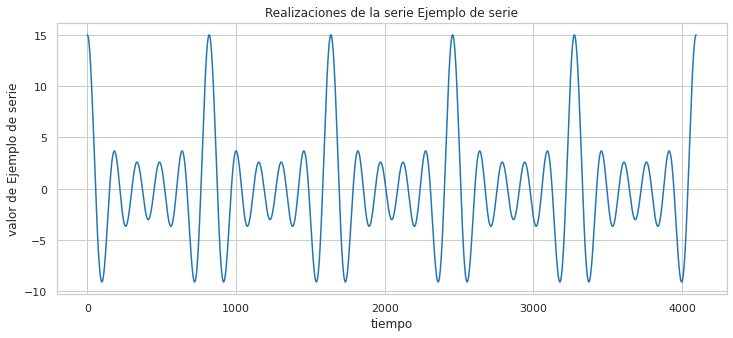

In [4]:
N = int(2**12)
t_max = 0.5
serie_cos = np.array([cosenos(t) for t in np.linspace(0,t_max,N)])

plot_series(serie_cos,'Ejemplo de serie')

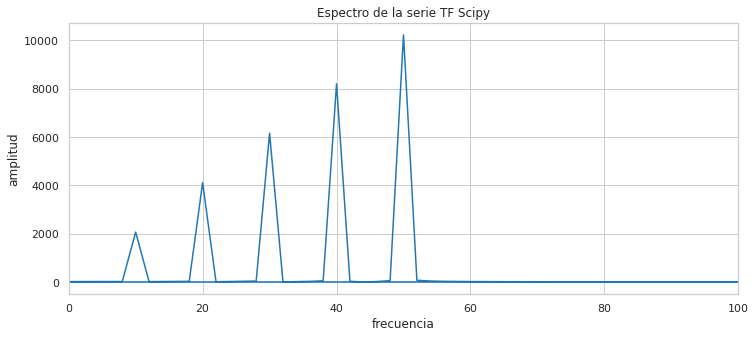

In [5]:
from scipy.fft import fft, fftfreq

ft_scipy = fft(serie_cos)
freq = fftfreq(N, t_max/N)

plot_spectrum(freq,np.abs(ft_scipy),'TF Scipy',ylabel='amplitud',max_freq=100)

In [9]:
%%time
ft_discrete = DiscreteFourierTransform(serie_cos)

CPU times: user 659 ms, sys: 0 ns, total: 659 ms
Wall time: 658 ms


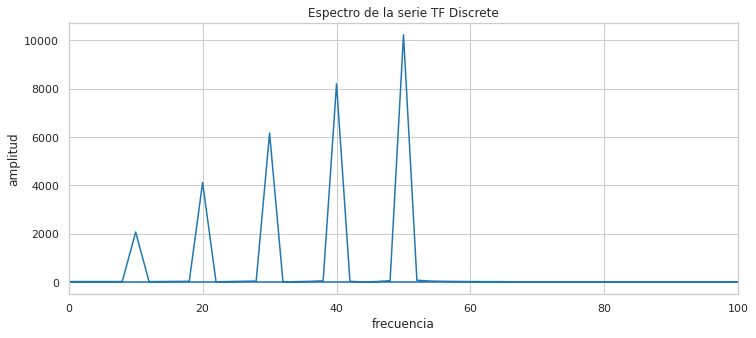

In [10]:
# plot_spectrum(np.linspace(0,100,N),ft_discrete,'TF Discrete');
plot_spectrum(freq,np.abs(ft_discrete),'TF Discrete',ylabel='amplitud',max_freq=100);

In [11]:
%%time
ft_fast = FastFourierTransform(serie_cos);

CPU times: user 84.4 ms, sys: 3.73 ms, total: 88.2 ms
Wall time: 87.1 ms


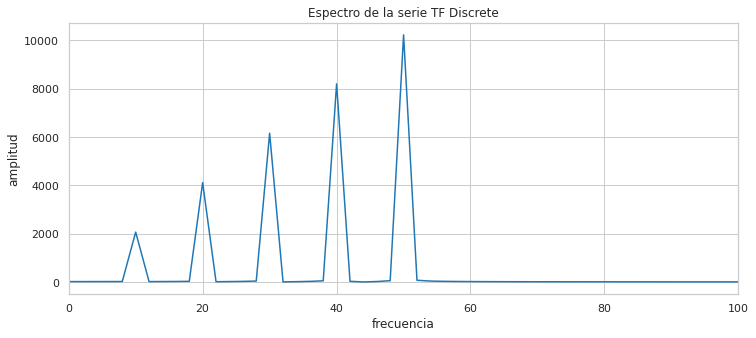

In [19]:
plot_spectrum(np.linspace(0,2*N,N),np.abs(ft_fast),'TF Discrete',ylabel='amplitud',max_freq=100);

In [21]:
hr1 = np.loadtxt('hr.7257.txt')
# hr2 = np.loadtxt('hr.11839.txt')

In [27]:
%%time
DiscreteFourierTransform(hr1[:2]);
pass

CPU times: user 164 µs, sys: 27 µs, total: 191 µs
Wall time: 147 µs


In [28]:
%%time
DiscreteFourierTransform(hr1[:8]);
pass

CPU times: user 589 µs, sys: 97 µs, total: 686 µs
Wall time: 421 µs


In [29]:
%%time
DiscreteFourierTransform(hr1[:32]);
pass

CPU times: user 1.77 ms, sys: 292 µs, total: 2.07 ms
Wall time: 1.27 ms


In [32]:
%%time
DiscreteFourierTransform(hr1[:128]);
pass

CPU times: user 3.69 ms, sys: 0 ns, total: 3.69 ms
Wall time: 3.07 ms


In [33]:
%%time
DiscreteFourierTransform(hr1[:512]);
pass

CPU times: user 26.6 ms, sys: 0 ns, total: 26.6 ms
Wall time: 25.8 ms


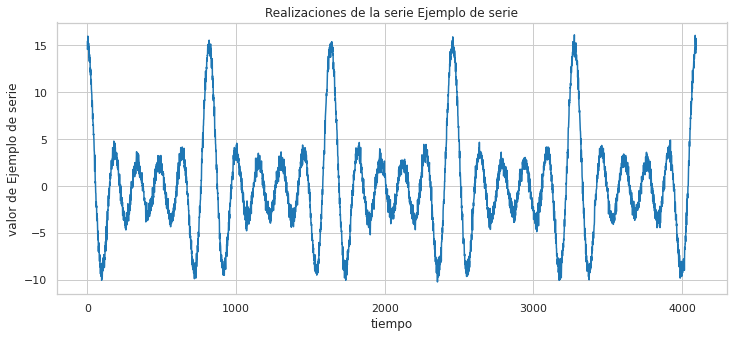

In [38]:
serie_cos_ruido = np.array([cosenos(t)+np.random.normal(0,0.5) for t in np.linspace(0,t_max,N)])

plot_series(serie_cos_ruido,'Ejemplo de serie')